# Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Kamron\Downloads\Achievement 4"

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

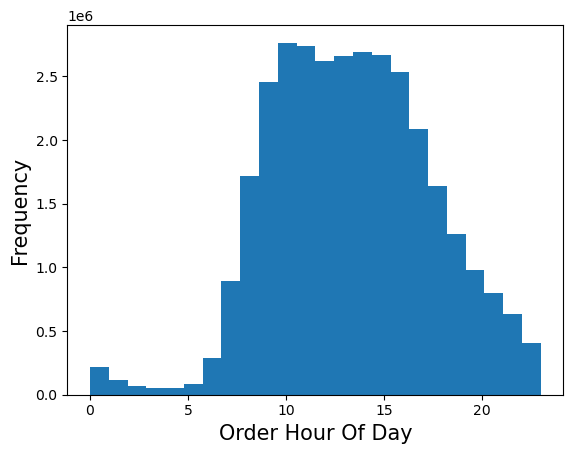

In [4]:
#create histogram
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24) #24hours 
plt.xlabel("Order Hour Of Day", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

### INSIGHTS
- The histogram shows that the order starts coming in slowly from 7AM, peaking at 10AM and sustain busy hours until 4PM. This suggests that the order is most frequent around the lunch time.

In [5]:
#exporting the visual
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [8]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


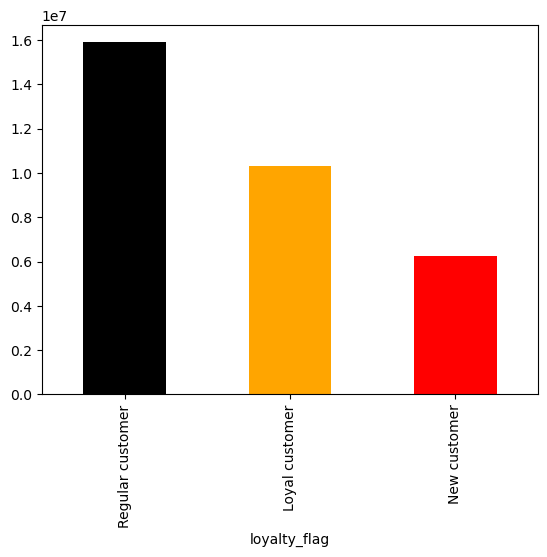

In [11]:
bar_loyalty_flag = ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color = ['black', 'orange', 'red'])

#### INSIGHTS
- Regular customer make up the most of instacart users.

In [13]:
#export the visualization 
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_number_orderes.png'))

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!

In [14]:
#make a sample data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [15]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [16]:
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev] 

In [17]:
#count the number of rows
len(big)+ len(small)

32434212

In [18]:
len(ords_prods_merge)

32434212

In [19]:
#Create a subset only containing columns 'prices' and 'order hour of day'
df = small[['prices', 'order_hour_of_day']]

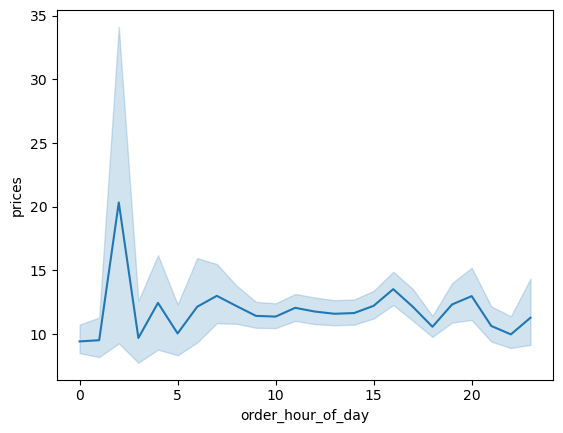

In [23]:
#create a line graph
line_price_hour = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

#### INSIGHTS
- There's no significant correlation between prices and order hour of day
#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:¶
- In a markdown cell beneath your line chart, describe what the line chart shows.

In [24]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   days_since_last_order  float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  _merge                 category
 15  busiest_day            object  
 16  Busiest_days           object  
 17  busiest_days           object  
 18  busiest_period_of_day  object  
 19  max_order              int64   
 20  loyalty_flag           object  
 21  mean_price             float6

In [26]:
#export the visualization
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status.png'))

#### INSIGHTS
- Married users make up the most of instacart users.

In [28]:
#6 making age brackets flags column
ords_prods_merge.loc[ords_prods_merge['age'] >= 90, 'age_bracket'] = '90+'

In [30]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 89) & (ords_prods_merge['age'] >= 80), 'age_bracket'] = '80-89'

In [31]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 79) & (ords_prods_merge['age'] >= 70), 'age_bracket'] = '70-79'

In [32]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 69) & (ords_prods_merge['age'] >= 60), 'age_bracket'] = '60-69'

In [33]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 59) & (ords_prods_merge['age'] >= 50), 'age_bracket'] = '50-59'

In [34]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 49) & (ords_prods_merge['age'] >= 40), 'age_bracket'] = '40-49'

In [35]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 39) & (ords_prods_merge['age'] >= 30), 'age_bracket'] = '30-39'

In [36]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 29) & (ords_prods_merge['age'] >= 20), 'age_bracket'] = '20-29'

In [37]:
ords_prods_merge.loc[(ords_prods_merge['age'] <= 19) & (ords_prods_merge['age'] >= 10), 'age_bracket'] = '10-19'

In [38]:
#checking the count for the age brackets of IC customers
ords_prods_merge['age_bracket'].value_counts(dropna = False)

age_bracket
40-49    5113807
30-39    5078053
20-29    5075049
50-59    5069098
70-79    5059735
60-69    4992031
80-89    1025384
10-19    1021055
Name: count, dtype: int64

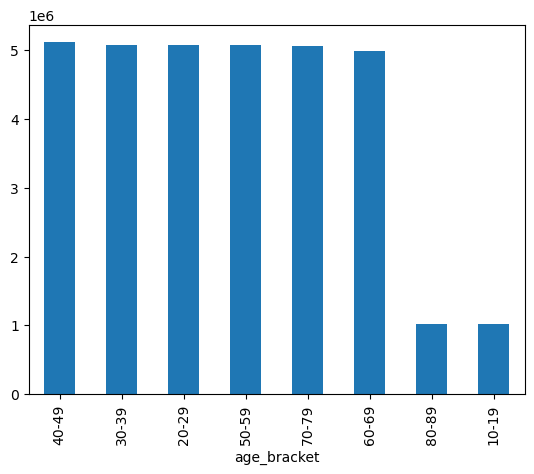

In [39]:
#bar chart on customers age bracket
bar_age_bracket = ords_prods_merge['age_bracket'].value_counts().plot.bar()

In [41]:
#export the visualization
bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_age.png'))

#### INSIGHTS
- IC customers are less likely to be between the ages of 80-89 and 10-19 the rest are about the same

In [42]:
#taking a look at the DF
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income,age_bracket
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39


In [44]:
#making a new df with just 2 columns in the small subset
df_3 = small[['num_of_dependants','age']]

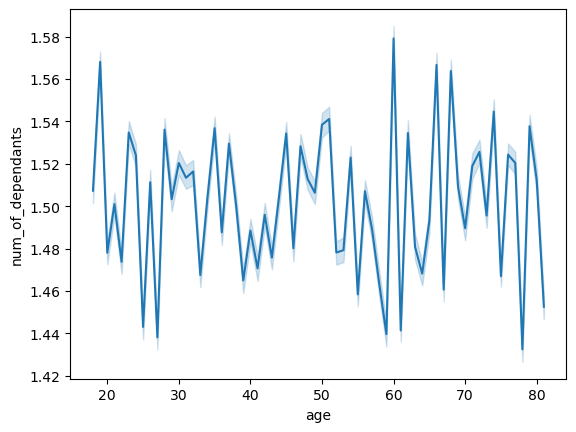

In [45]:
#6 line chart exploring age and number of dependants
line_age_dependants = sns.lineplot(data = df_3, x = 'age',y = 'num_of_dependants')

#### INSIGHTS
- There's no connection between the number of dependants and age.

In [46]:
#export the visualization
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_age.png'))

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

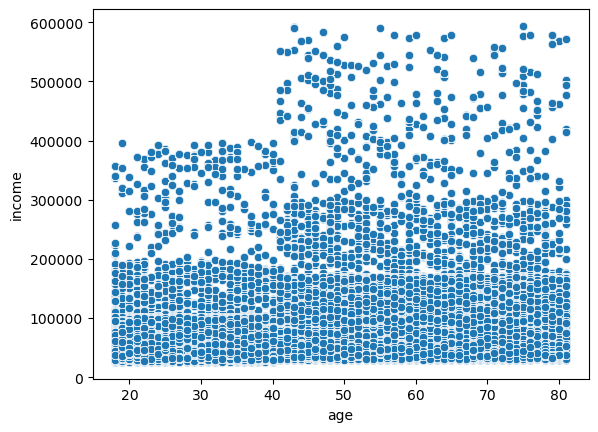

In [47]:
#create scatterplots
age_income_scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_merge)

#### INSIGHTS
- From 40 years old the income surpass 400,000.

In [49]:
#export the visualization
age_income_scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

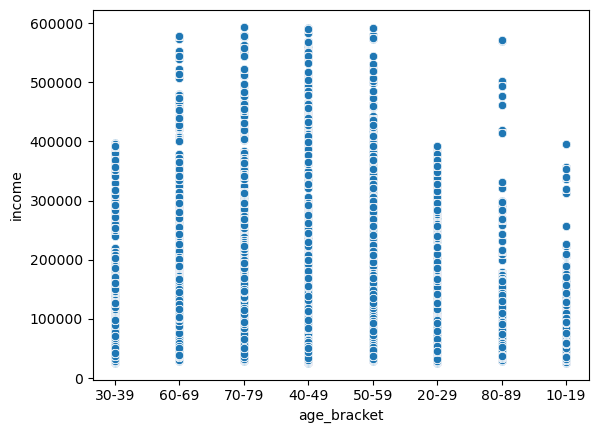

In [50]:
#7 scatterplot of age and income
scatter_age_bracket_income = sns.scatterplot(x = 'age_bracket', y = 'income',data = ords_prods_merge)

#### INSIGHTS
- the scatterplot shows that once the customer is about 40+ they a higher income. approx 40K and higher

In [51]:
#export the visualization
scatter_age_bracket_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))